# Machine Learning Assigment #3

- Miguel Lara
- Andree Vela

In this work, we will apply two classification techniques to the Abalone [dataset](https://archive.ics.uci.edu/ml/datasets/Abalone). 




## **Summary** ##

This Jupyther Notebook presents the implementation of two classification algorithms, **Decision Trees and K-Nearest Neighbors**. For both implementions the same methodology is applied (Data Preparation, Feature Selection and Modeling tunning (finding the best parameters). This Notebook also compares the performance of both models and conclude that both provide almost the same results.

## **Introduction**

We will present the data preprocesing and analysis required to train and evaluate the performance of two distinct ML classifiers. Such classifiers are:

- Decision Tress
- K-NN

Each of this classification models have specific data related requirements which have to be addressed individualy. In the rest of this document we will describe briefly the background of the dataset used, then the data 
preprocessing, training and evaluation of each the ML classification models mentioned above. 




## **Dataset Description**

Data comes from an original (non-machine-learning) study:
Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994)
"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait",
Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

## **General Exploration / Visualization**

In the following section, we will explore the dataset, their attributes, some of their statistical properties and also we will make some simple visualizations in order to gain some general understanding of the data. 
Let us start with the loading of the data and their attributes types:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# This file contains the abalone dataset

names = [
  'Sex', 
  'Length(mm)', 
  'Diameter(mm)', 
  'Height(mm)', 
  'Whole weight(gr)', 
  'Shucked weight(gr)', 
  'Viscera weight(gr)', 
  'Shell weight(gr)', 
  'Rings'];

df = pd.read_csv( './abalone.data', header=None, names = names )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex                   4177 non-null object
Length(mm)            4177 non-null float64
Diameter(mm)          4177 non-null float64
Height(mm)            4177 non-null float64
Whole weight(gr)      4177 non-null float64
Shucked weight(gr)    4177 non-null float64
Viscera weight(gr)    4177 non-null float64
Shell weight(gr)      4177 non-null float64
Rings                 4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


As we can see, we have 8 attributes without our target attribute (which is the number of rings). Also, for our benefit, we appreciate that there is no null/empty values in the dataset. This is explained because the null values were removed by the original researchers. Also, we can see that the Sex attribute have a nominal type, which means probably we will have to deal with this later when we preprocess the data. Finally the size of the dataset is 4177 instances. Now let us take a look at some of the data distribution properties:


,Sex,Length(mm),Diameter(mm),Height(mm),Whole weight(gr),Shucked weight(gr),Viscera weight(gr),Shell weight(gr),Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


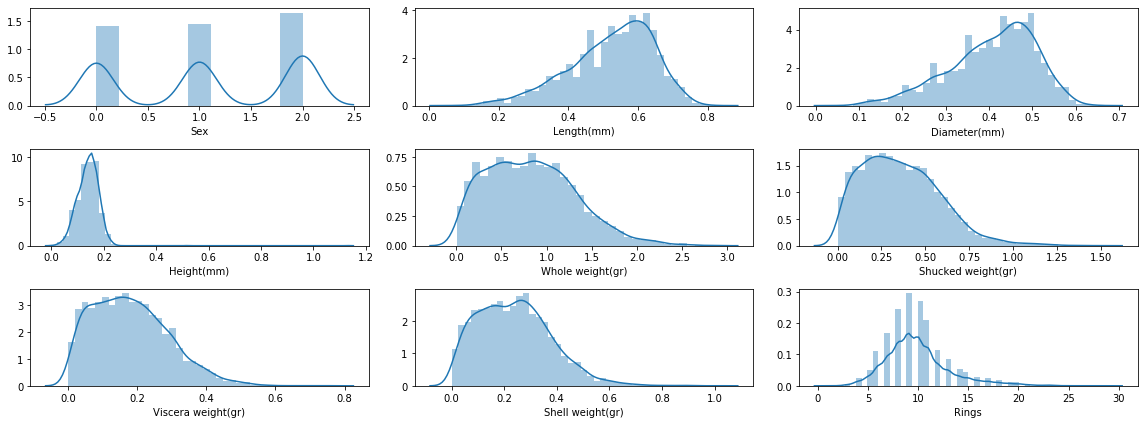

In [3]:
from sklearn.preprocessing import LabelEncoder

def plot_dataset_distribution( df ):
  fig, axs = plt.subplots( 3, 3, figsize = ( 16, 6 ) )
  for i, feature in enumerate( df.columns ):
    sns.distplot( df[ feature ], ax = axs[ int( np.floor( i / 3 ) ) ][ i % 3 ] )
  plt.tight_layout()

# We encode sex values to numerical values. We do not care about the generated values,
# because decision trees can deal with them without making relationship assumptions.

le_sex = LabelEncoder()
le_sex.fit( [ 'F', 'M', 'I' ] )
df_encoded = df.copy()
df_encoded[ 'Sex' ] = le_sex.transform( df_encoded[ 'Sex' ] )

# Plotting

plot_dataset_distribution( df_encoded )
df_encoded.describe()

As we can see in the plots, almost all the attributes presented a normal distritbution, except **Sex**, but this is easly explained by the aritificial encoding we performed before plotting. 

In the plots bellow, we presented the varianza of the 8 attributes and the target attribute. We used separete plots because the scale from the target attribute is dimentional different from the rest of attributes. 

In the plot from the left, we can see the attribute **whole weight** is the one presented more variance. The rest of attributes has a much more concentrated data. Even tough, all attributes presented some outlier values, which we will have to deal later.  

On the other hand, we presented the variance of the **target** value, wich as the attribute values, it also presented a low variance and some outlier values. 

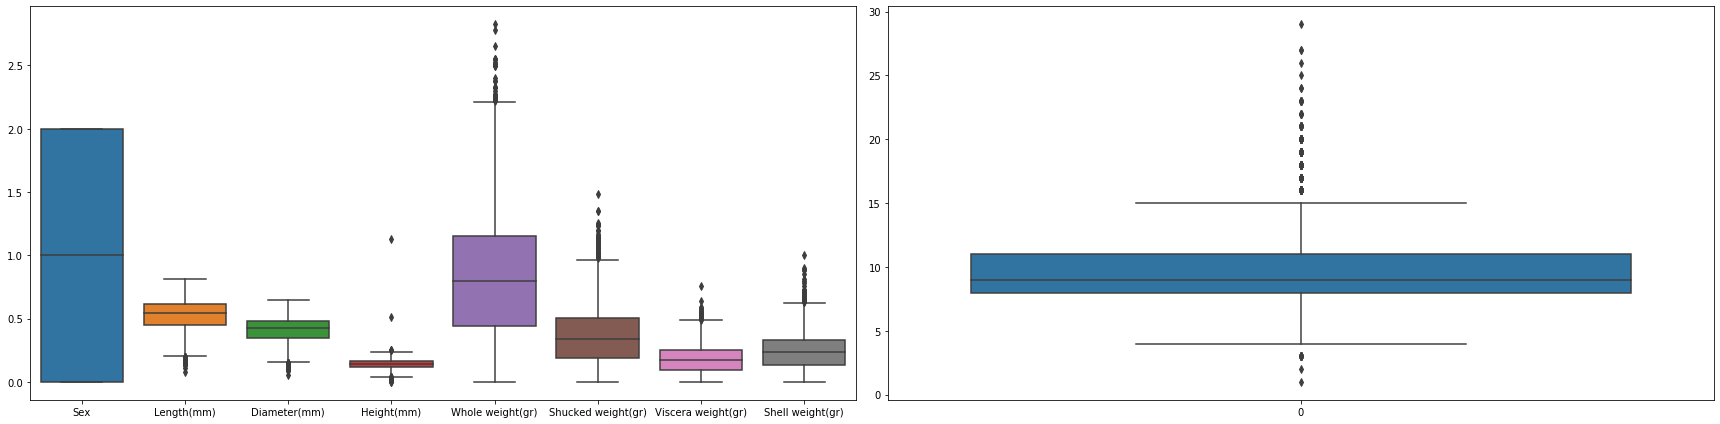

In [4]:
fig, ax = plt.subplots( 1, 2, figsize = ( 24, 6 ) )
sns.boxplot( data = df_encoded[ df_encoded.columns[ : -1 ] ], ax = ax[ 0 ] )
sns.boxplot( data = df_encoded[ df_encoded.columns[ -1 ] ], ax = ax[ 1 ] )
fig.tight_layout()


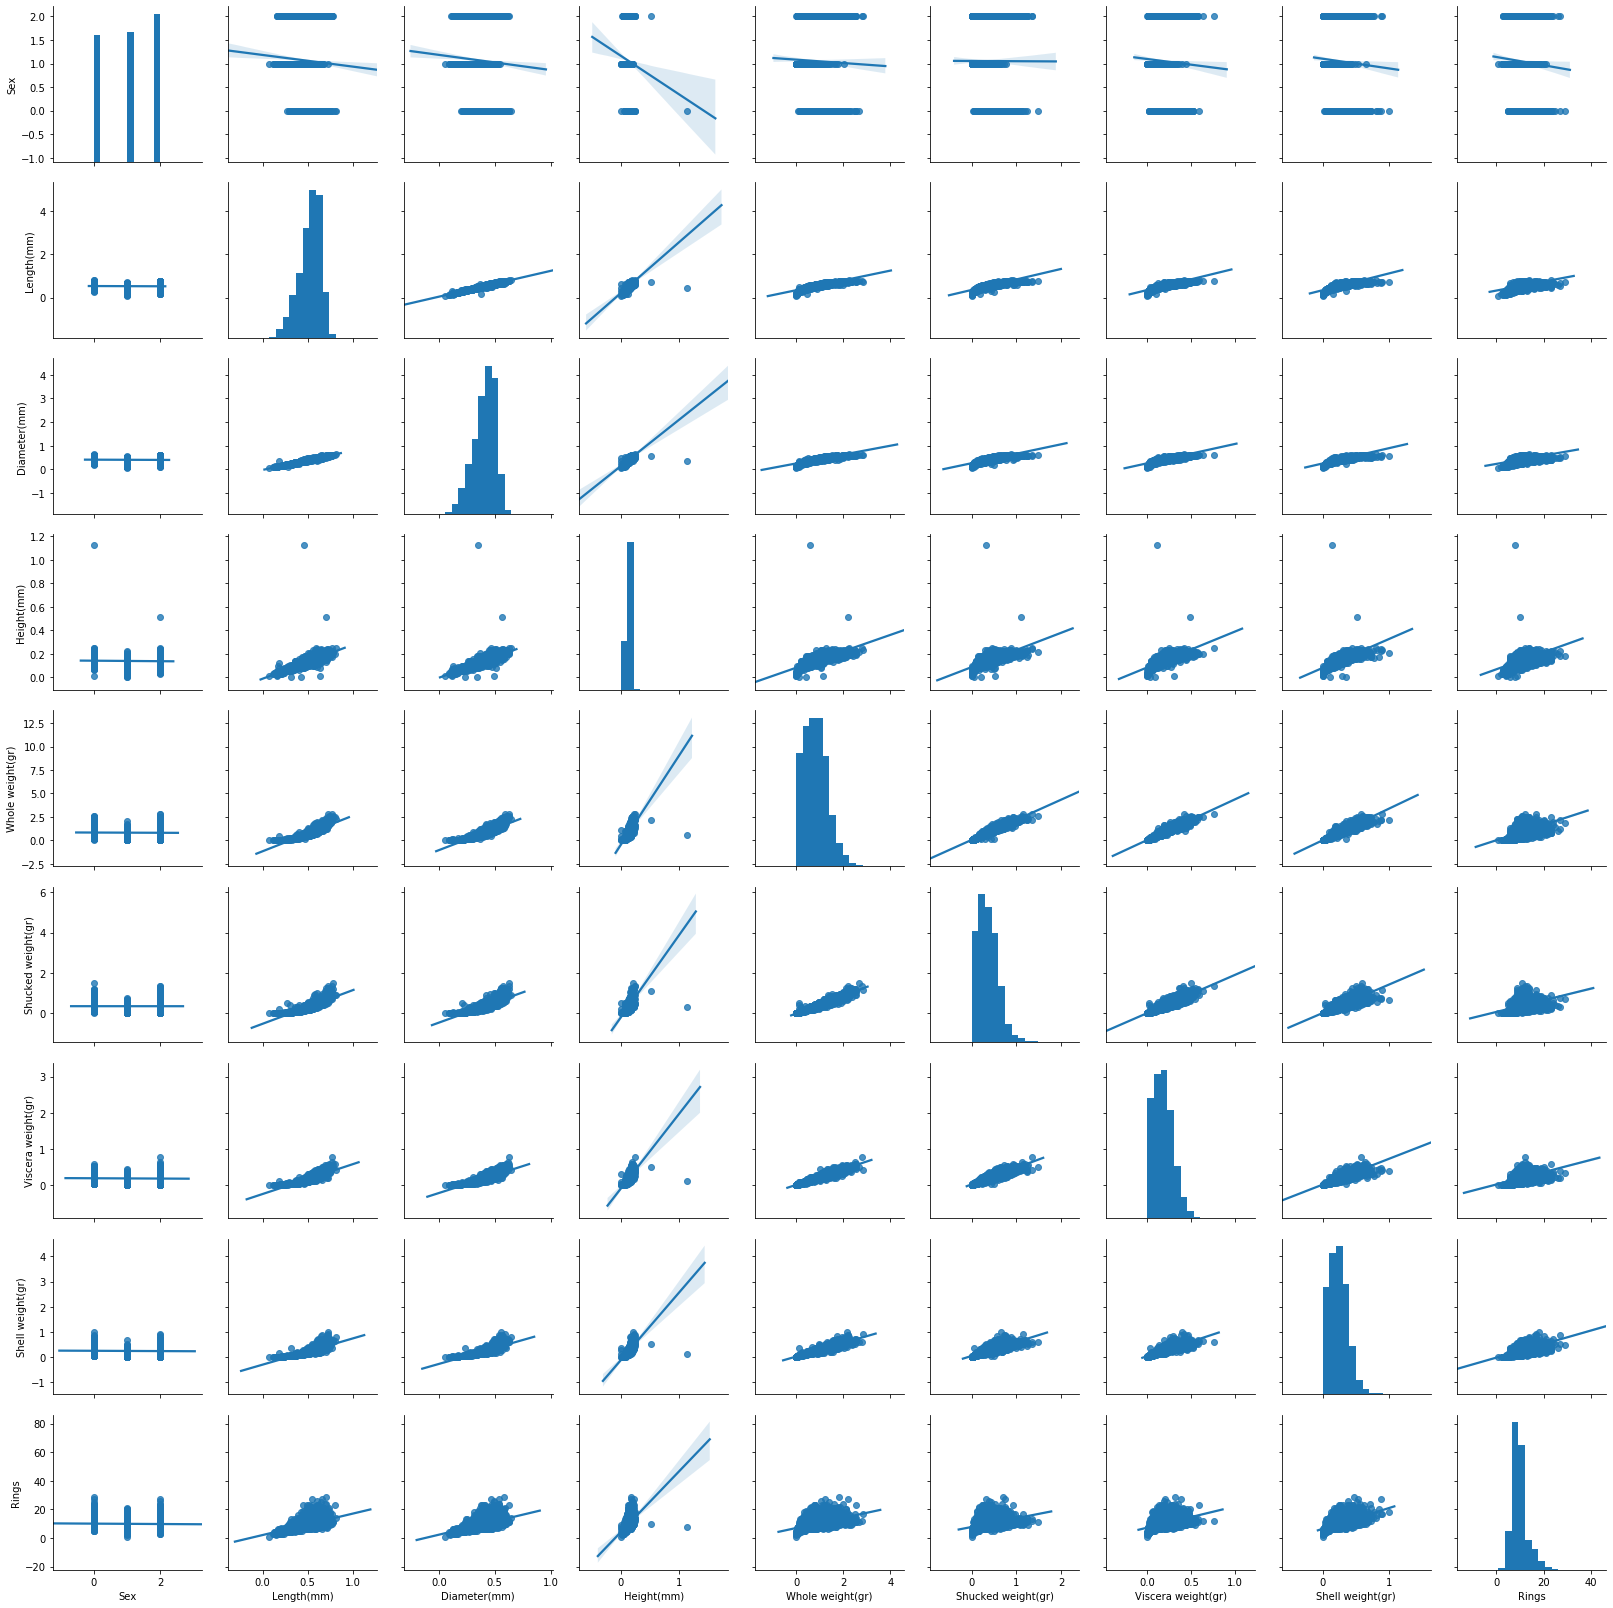

In [5]:
sns.pairplot( df_encoded, kind = "reg" )

## **Decision Trees**

Know we will start the specific analysis for the decision trees. As we mention before, the dataset contains a non numerical attribute, which is **Sex**. Although, for the specific case of tree based classifiers this is not a problem, because this kind of classifieres can deal naturaly with nominal and text based attributes. Regarding the scaling of the attributes, we consider the diference between the scale of the attributes as not significate, and again decision trees can deal very weel with diferent scale in their attributes, opposite to other classification techniques like K-NN, which is very sensible to different scale in their attributes. 




In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X_tree, y_tree = df_encoded.filter( names[ : -1 ] ), df_encoded.filter( names[ len( names ) - 1 : ] )

# Splitting in training an test,  and training the model
# splits 75% / 25% 

training_X, test_X, training_y, test_y = train_test_split( X_tree, y_tree, test_size = .25 )
tree_model = DecisionTreeClassifier( criterion = "entropy" )
tree_model.fit( training_X, training_y )

# Using the model to makes predictions

def predict( model, training_X, test_X ):
  predicted_training_y = model.predict( training_X )
  predicted_training_y = predicted_training_y.reshape( len( predicted_training_y ), 1 )

  predicted_test_y = model.predict( test_X )
  predicted_test_y = predicted_test_y.reshape( len( predicted_test_y ), 1 )

  return predicted_training_y, predicted_test_y

predicted_training_y, predicted_test_y = predict( tree_model, training_X, test_X )


Let us create a simple routine which allowed us to visualize the results of the predictions.


In [7]:
def scatter_y( y, predicted_y, ax ):
    """
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines
    Returns the root mean square of the error
    """

    ax.plot( y, predicted_y, '.k' )

    ax.plot( [ 0, 30 ], [ 0, 30 ], '--k' )
    ax.plot( [ 0, 30 ], [ 2, 32 ], ':k' )
    ax.plot( [ 2, 32 ], [ 0, 30 ], ':k' )

    rmse = ( y - predicted_y ).std()

    ax.text( 25, 3, "Root Mean Square Error = %.3g" % 
            rmse, ha='right', va='bottom')

    ax.set_xlim( 0, 30 )
    ax.set_ylim( 0, 30 )

    ax.set_xlabel( 'True number of rings' )
    ax.set_title( 'Test title' )

    return rmse

def visualize_predictions( train_y, predicted_train_y, test_y, predicted_test_y ):
    fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize = ( 16, 8 ), sharey = True )
    
    scatter_y( train_y.values, predicted_train_y, ax1 )
    ax1.set_title( 'Training Data' )
    ax1.set_ylabel( 'Predicted number of rings' )
    rmse = scatter_y( test_y.values, predicted_test_y, ax2 )
    ax2.set_title( 'Test Data' )
    
    plt.tight_layout()
    plt.show()

    return rmse

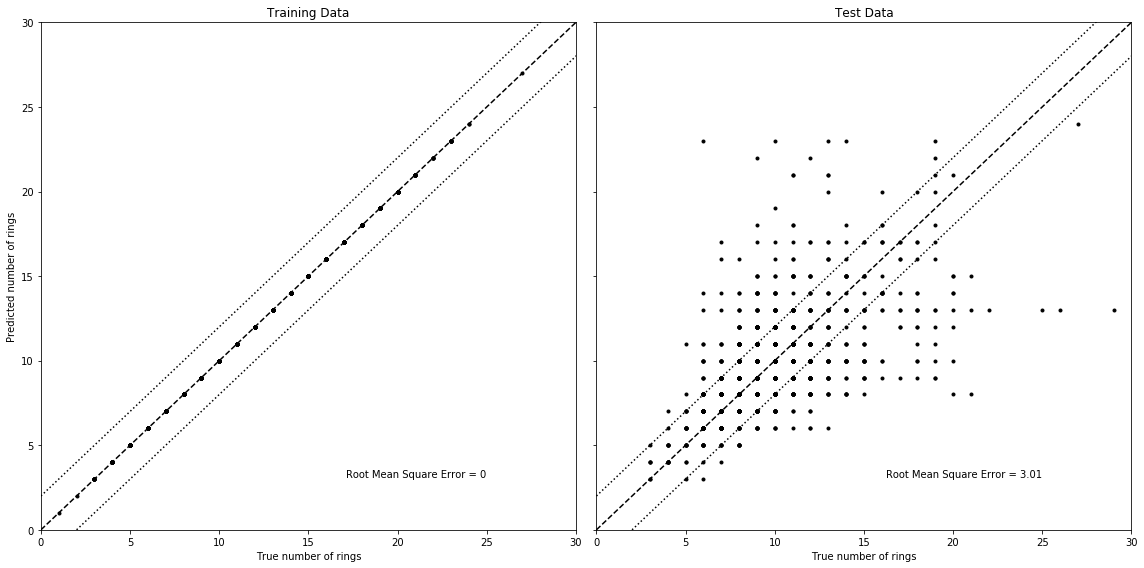

3.009767909411633

In [8]:
visualize_predictions( training_y, predicted_training_y, test_y, predicted_test_y )

As we can see, the training data has been fitted perfectly. However, as we can see in the test data visualization, the fitting is not that good. This is strong evidence that our tree suffers from **overfitting**. This is normal, because we did not constraint neither the max-depth or the minimal population for splitLets take a look at the tree before start the tunning.

In [57]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn import tree
#import graphviz 
#import pydotplus

#def plot_tree( model, file_name, names ):
#    tree_plot_data = StringIO()
#    tree.export_graphviz( 
#        model, 
#        out_file = tree_plot_data, 
#        feature_names = names,  
#        filled = True, 
#        rounded = True,  
#        special_characters = True )  
#
#    graph =  pydotplus.graph_from_dot_data( tree_plot_data.getvalue() )
#    graph.write_png( file_name + '.png' ) # you can see the tree in detail in the image
    
#    return graph

# plot_tree( tree_model, 'initial-tree', names[ :-1 ] )

In [10]:
# The depth of our tree

max_depth = tree_model.get_depth()
print( 'The maximum depth is:', max_depth )

The maximum depth is: 25


Also, let us see how is the importance of the features

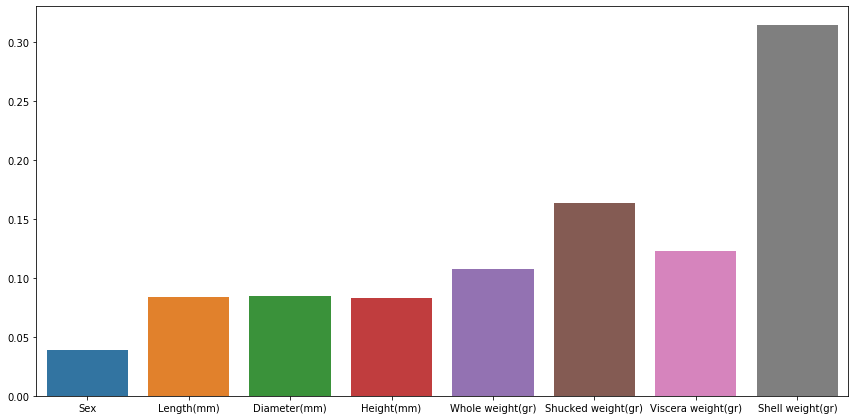

In [11]:
def plot_features_importance( model, features ):
    fig, ax = plt.subplots( figsize = ( 12, 6 ) )
    plt.tight_layout()
    sns.barplot( x = features, y = model.feature_importances_ )

plot_features_importance( tree_model, names[ :-1 ] )

As wee see the most irrelevant feature is **Sex**, followed by diameter and Height. This has some evidenve that maybe those features are not relevant for the tree and we can remove them. But before doing this, we will try to reduce the max-depth of our tree-model to 

### Depth Optimization


#### Cost complexity prunning approach
As we mention before, we will try to optimize the depth of the tree. Currently our tree has a max depth of **20**, which is a relative great value. To reduce the depth, we will analyce the cost complexity to perform a **post-pronuning**. 

The scikitlearn library provide us with the parameter ccp  (cost complexity pruning) which corresponds to the parameter alpha of the minimal cost complexity pruning algorithm. For more details about this algotihm, please check [here](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning). For now, it is enough to understand that alpha characterized the nodes that are going to be prune first, and that a greater value of alpha implys a smaller depth. One last concept is about **leaves impurities**, which is the probability for an instance to be missclassified. 

Let us start by obtanining all the alpha values (one per depth level) of our overfitted tree model. 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

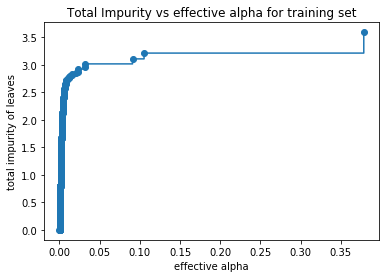

In [12]:
path = tree_model.cost_complexity_pruning_path( training_X, training_y )
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot( ccp_alphas, impurities, marker='o', drawstyle = "steps-post" )
ax.set_xlabel( "effective alpha" )
ax.set_ylabel( "total impurity of leaves" )
ax.set_title( "Total Impurity vs effective alpha for training set" )


As we can see in the graph, as the value of alpha increases, the value of the impurity increase too. The right most value corresponds to the alpha and impurity for a tree with just the root node (which explains why it has the greatest impurity). For the rest of the analysis, we will remove this values for being trivial.

Now, let us take this alpha values and train one model per each, to see how the number of nodes and the maximum depth behaves. 


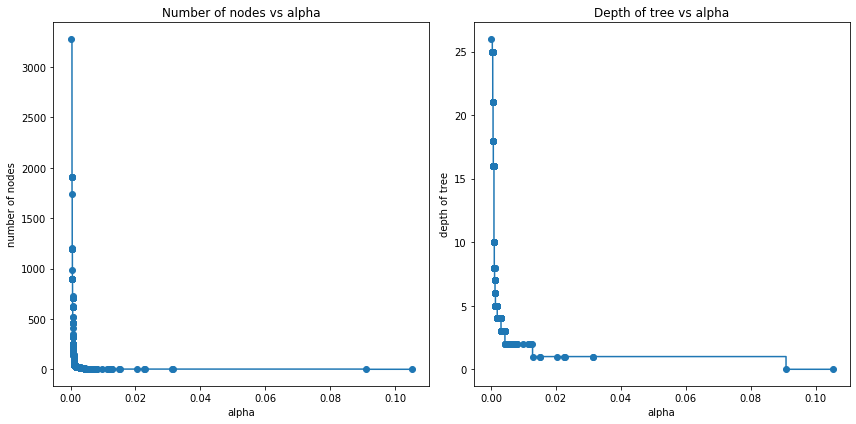

In [13]:
# Removing last element from alphas an inpurities and 
# training a model for all remaining values.

ccp_alphas = ccp_alphas[ :-1 ]
impurities = impurities[ :-1 ]

models = []
for ccp_alpha in ccp_alphas:
    m = DecisionTreeClassifier( random_state = 0, ccp_alpha = ccp_alpha )
    m.fit( training_X, training_y )
    models.append( m )

# Counting nodes and depth for each model

node_counts = [ m.tree_.node_count for m in models ]  
depths = [ m.tree_.max_depth for m in models ]

# plotting results

fig, ( ax0, ax1 ) = plt.subplots( 1, 2, figsize = ( 12, 6 ) )

ax0.plot( ccp_alphas, node_counts, marker = 'o', drawstyle = "steps-post" )
ax0.set_xlabel( 'alpha' )
ax0.set_ylabel( 'number of nodes' )
ax0.set_title( 'Number of nodes vs alpha' )

ax1.plot( ccp_alphas, depths, marker = 'o', drawstyle = "steps-post" )
ax1.set_xlabel( 'alpha' )
ax1.set_ylabel( 'depth of tree' )
ax1.set_title( 'Depth of tree vs alpha' )

fig.tight_layout()

The plots show clearly that as alpha increases, it dramatically reduces the amount of nodes and the depth of the tree. 

Know let us analize how the accuracy of this models was affected by the value of alpha. 

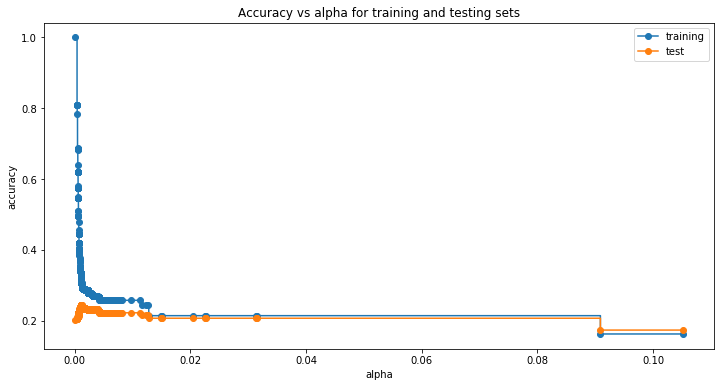

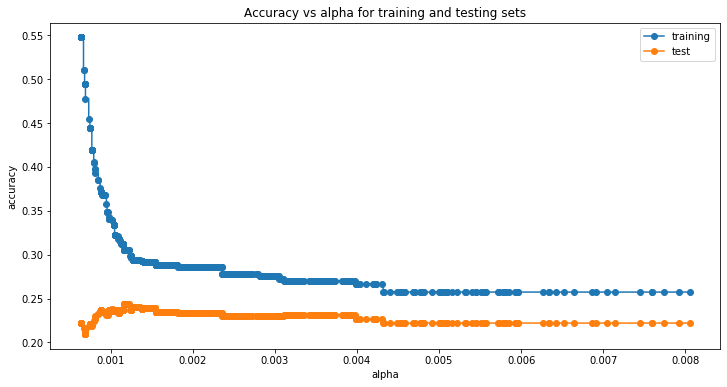

In [14]:
def plot_tree_alpha_vs_accuracy( alphas, training_scores, test_scores ):
  fig, ax = plt.subplots( figsize = ( 12, 6 ) )
  ax.set_xlabel( 'alpha' )
  ax.set_ylabel( 'accuracy' )
  ax.set_title( 'Accuracy vs alpha for training and testing sets' )

  ax.plot( alphas, training_scores, marker='o', label='training', drawstyle="steps-post")
  ax.plot( alphas, test_scores, marker='o', label="test", drawstyle="steps-post")

  ax.legend()
  plt.show()

training_scores = [ m.score( training_X, training_y ) for m in models ]
test_scores = [ m.score( test_X, test_y ) for m in models ]

plot_tree_alpha_vs_accuracy( ccp_alphas, training_scores, test_scores )
plot_tree_alpha_vs_accuracy( ccp_alphas[ 70:-16 ], training_scores[ 70:-16 ], test_scores[ 70:-16 ] )

The second graph is an an expanded version of the area betwwen 0.0 and .01. There we can see that the accuracy of the test data increases as the value of alpha does, until a maximum near .25, an then start decreasing again. We select the value of **.0022** as the one which maximize the accuracy (there are other values altough). Now, let us calculate the exact accuracy for a model with this valur of alpha.

In [15]:
m2 = DecisionTreeClassifier( random_state = 0, ccp_alpha = .0022 )
m2.fit( training_X, training_y )
training_score = m2.score( training_X, training_y )
test_score = m2.score( test_X, test_y )

print( 'The accuracy is: %0.5g' % test_score )

The accuracy is: 0.23349


#### Learning Curves approach
We will try a second approach to find the optimal depth. Now we will gradually constraint the maximum depth until minimum of two, and observe how this affects the learning performance of the classifier. Also this will give us information about how much training data we should use. Let us start by plotting the learning curves from some depth values to see if there is a general pattern between the maximum depth and the model error.  

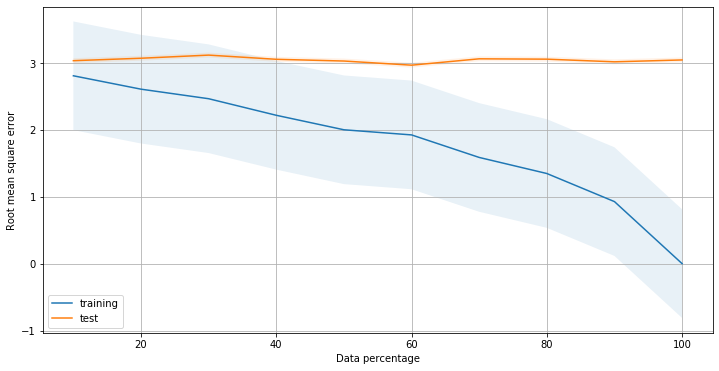

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def calculate_error_curves( model, data_percentage, training_data, test_data ):
    training_error = []
    test_error = []

    for percentage in data_percentage:
        number_of_samples = int( percentage / 100. * len( training_data[ 1 ] ) )
        model.fit( training_data[ 0 ][ 0:number_of_samples ], training_data[ 1 ][ :number_of_samples ] )

        predicted_train_y = model.predict( training_data[ 0 ] )
        predicted_train_y = predicted_train_y.reshape( len( predicted_train_y ), 1 )

        predicted_test_y = model.predict( test_data[ 0 ] )
        predicted_test_y = predicted_test_y.reshape( len( predicted_test_y ), 1 )

        training_error.append( ( predicted_train_y - training_data[ 1 ] ).std() )
        test_error.append( ( predicted_test_y - test_data[ 1 ] ).std() )
      
    return training_error, test_error

def plot_error_curves( model, training_data, test_data ):
    data_percentage_array = np.linspace( 10, 100, 10 )
    training_error, test_error = calculate_error_curves( model, data_percentage_array, training_data, test_data )
    training_std =  np.std( training_error )
    test_std =  np.std( test_error )

    fig, ax = plt.subplots( figsize = ( 12, 6 ) )
    plt.plot( data_percentage_array, training_error, label='training' )

    plt.fill_between( data_percentage_array, 
                     ( training_error - training_std ).reshape( 10 ),
                     ( training_error + training_std ).reshape( 10 ),
                     alpha=0.1 )

    plt.plot( data_percentage_array, test_error, label='test')
    plt.fill_between( data_percentage_array, 
                     ( test_error - test_std ).reshape( 10 ),
                     ( test_error + test_std ).reshape( 10 ),
                     alpha=0.1 )
    
    plt.grid()
    plt.legend( loc = 3 )
    plt.xlabel( 'Data percentage' )
    plt.ylabel( 'Root mean square error' );
        
plot_error_curves( tree_model, ( training_X, training_y ), ( test_X, test_y ) )

This is the learning curve for our current model with a depth of 20. We can see that even when the error during training decreases, this does not affect the amount of error for the test data. This confirms the overfitting of our model. We need to make our model more general to estimate test data better. Bellow we present the learning curves for models with maximum depth of 15, 10, 6, and 3.


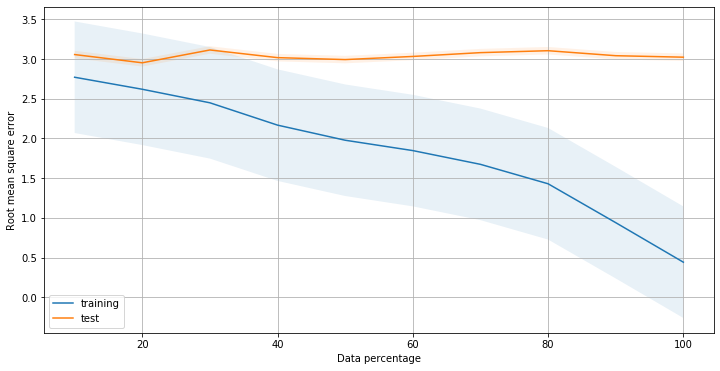

In [17]:
another_tree_model = DecisionTreeClassifier( criterion = "entropy", max_depth = 15 )
plot_error_curves( another_tree_model, ( training_X, training_y ), ( test_X, test_y ) )

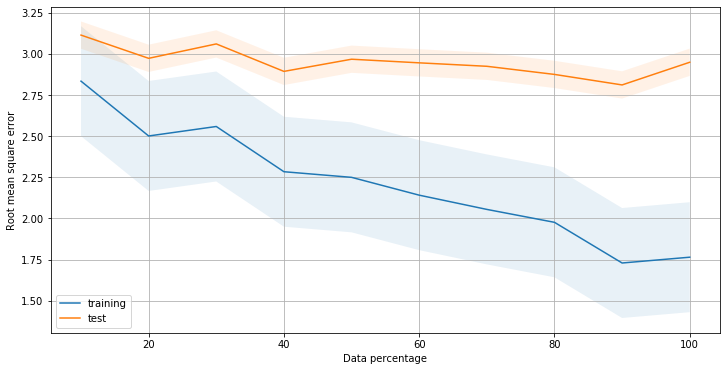

In [18]:
another_tree_model = DecisionTreeClassifier( criterion = "entropy", max_depth = 10 )
plot_error_curves( another_tree_model, ( training_X, training_y ), ( test_X, test_y ) )

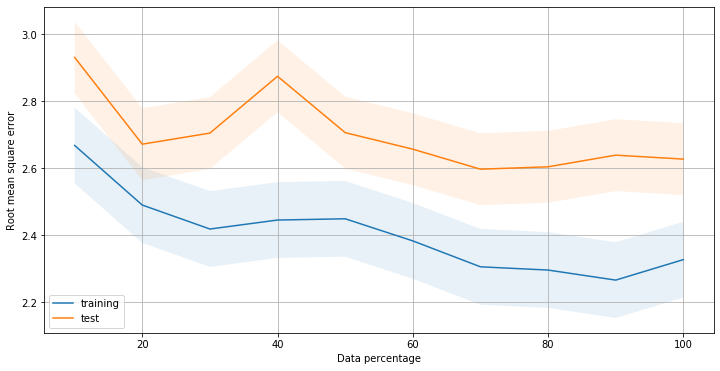

In [19]:
another_tree_model = DecisionTreeClassifier( criterion = "entropy", max_depth = 6 )
plot_error_curves( another_tree_model, ( training_X, training_y ), ( test_X, test_y ) )

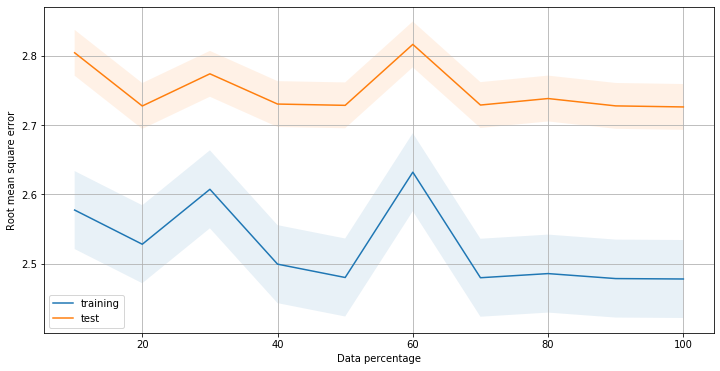

In [20]:
another_tree_model = DecisionTreeClassifier( criterion = "entropy", max_depth = 3 )
plot_error_curves( another_tree_model, ( training_X, training_y ), ( test_X, test_y ) )

We have seen that there exist a trend to **RMSE** to reduce for testing data as we reduce the depth of the tree model. Now let us find which depth get us the lowest RMSE error, and also let us plot their learning curves for training and testing to understand which percentage of training data is the right balance (without overfitting or underfitting).

First we will train a model for each depth from max-depth until two. Then we will find the minimum RMSE for each model using different amounts of data and steps of 10% (i. e. we will start using just 10% of the data, then 20%, 30%, and so on until reach the 100%). Finally we will find the minimum RMSE between models, and we will plot the tree structure, the learning curves and the features significance for the model corresponding with that RMSE. 

In [21]:
# We will start from our current tree max_depth to a min-depth of 2

depths =  np.linspace( 2, max_depth, max_depth - 1 )[ ::-1 ]

# For the learning process, we will start from 10% and increment in steps of 10%
# until we reach the 100% of the training data. 

data_percentage_array = np.linspace( 10, 100, 10 )

test_errors = []
training_error = []

for index, depth in enumerate( depths ):
    model = DecisionTreeClassifier( criterion = "entropy", max_depth = depth )
    
    trai_err, test_err = calculate_error_curves( 
        model, data_percentage_array, 
        ( training_X, training_y ), 
        ( test_X, test_y ) )
    training_error.append( trai_err )
    test_errors.append( test_err )

Depth: 25, min-error: 2.99636
Depth: 24, min-error: 2.9447
Depth: 23, min-error: 2.97018
Depth: 22, min-error: 2.97386
Depth: 21, min-error: 2.90187
Depth: 20, min-error: 2.9948
Depth: 19, min-error: 2.96319
Depth: 18, min-error: 2.98265
Depth: 17, min-error: 2.92973
Depth: 16, min-error: 2.91503
Depth: 15, min-error: 2.94489
Depth: 14, min-error: 2.94873
Depth: 13, min-error: 2.93584
Depth: 12, min-error: 2.94584
Depth: 11, min-error: 2.80966
Depth: 10, min-error: 2.8317
Depth: 9, min-error: 2.70555
Depth: 8, min-error: 2.61803
Depth: 7, min-error: 2.51541
Depth: 6, min-error: 2.59338
Depth: 5, min-error: 2.56605
Depth: 4, min-error: 2.53822
Depth: 3, min-error: 2.72602
Depth: 2, min-error: 2.77177

The global min is: Depth: 7.0, RMSE: 2.51541


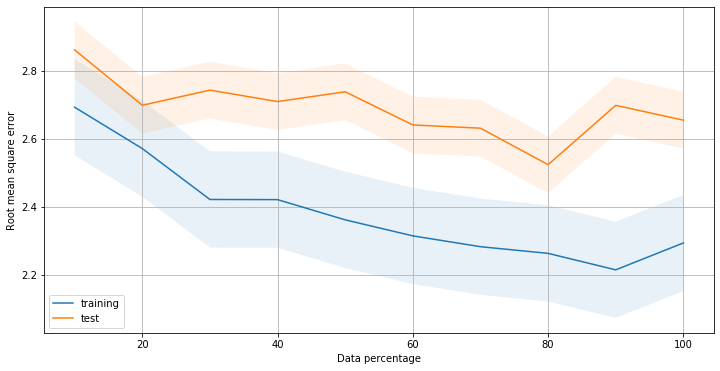

In [58]:
# We will present the min RMSE value obtained for each depth
# in test data. We use test data because is the error wich is 
# more important to minimize.

for index, item in enumerate( test_errors ):
  print( 'Depth: %s, min-error: %5g' % ( max_depth - index,  np.amin( item ) ) )

print()
min_rmse_depth = max_depth - np.floor( np.argmin( test_errors ) / len( data_percentage_array ) )
print( 'The global min is: Depth: %s, RMSE: %5g' % ( min_rmse_depth, np.amin( test_errors ) ) )

min_tree_model = DecisionTreeClassifier( criterion = "entropy", max_depth = min_rmse_depth )
plot_error_curves( min_tree_model, ( training_X, training_y ), ( test_X, test_y ) )
#graph = plot_tree( min_tree_model, 'min-tree', names[ :-1 ] )
#Image( graph.create_png() )

In the code is indicated the optimal depth and their corresponding RMSE value. Also we presented the structure of the correopnding tree and their learing curves. 


### Features Selection

Now the depth of our tree has been optimized, we will focus on the features. First we will present the features significance of our optimal depth model:

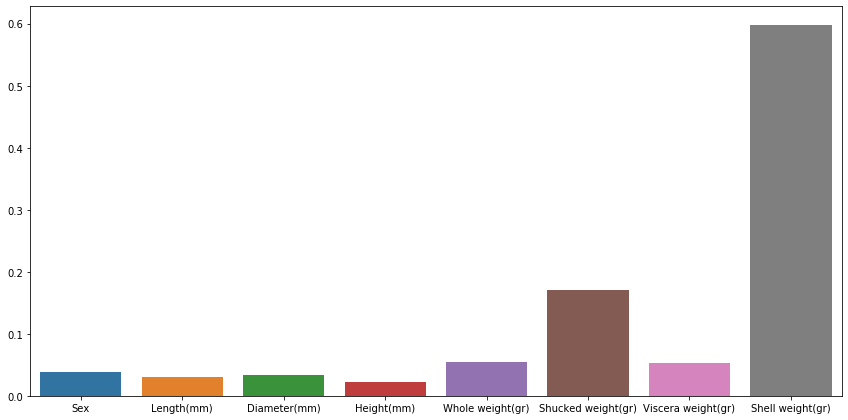

In [25]:
plot_features_importance( min_tree_model, names[ :-1 ] )

As we can see,  all attributes except for **Shuked weight** and **Shell weight** are almost irrelevant for the model. So, using it for the prediction, will bring more noise and complexity from the data than relevant information. Hence, we will optimize the number of features using only those two we already mentioned and evaluate again our model.

First we will take from the dataset, just the two features that are relevant. Then we will train a new model using just those features, but also, using the recommended amount of training data we found in the depth analysis. Finally we will plot the training and test data estimations vs real values, the tree structure, and the features significance. 


90


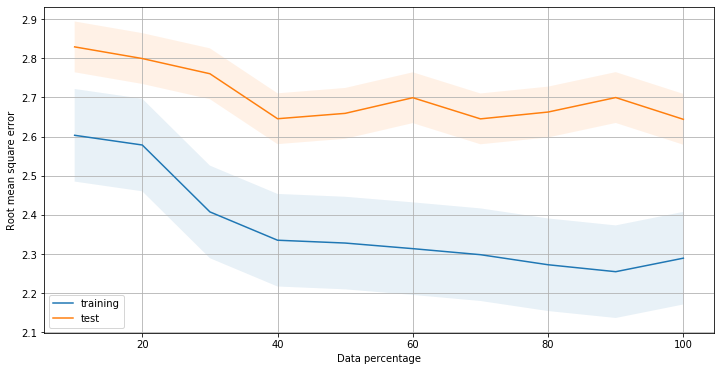

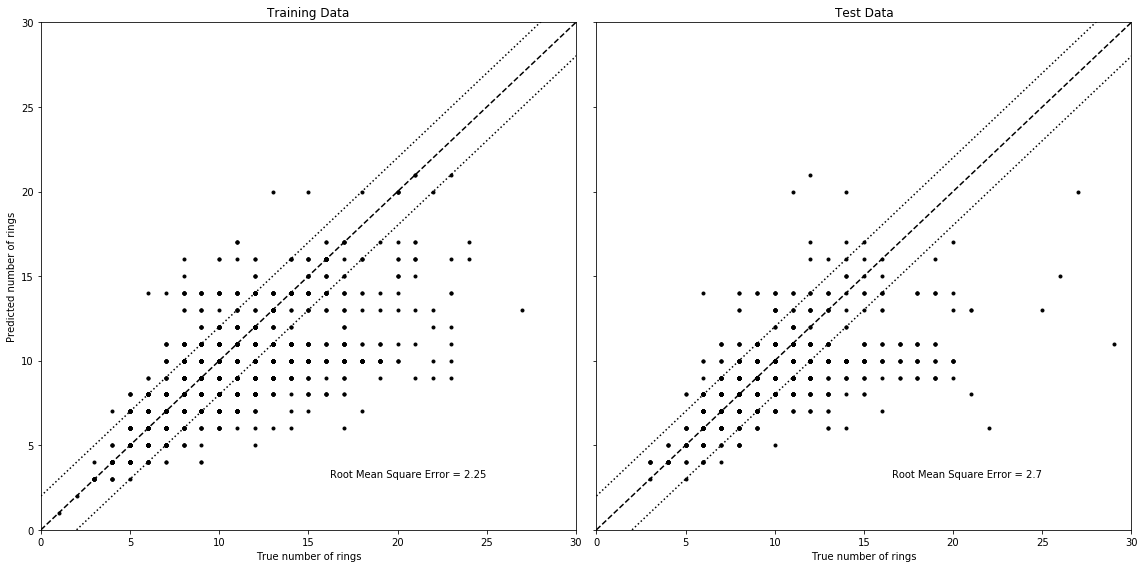

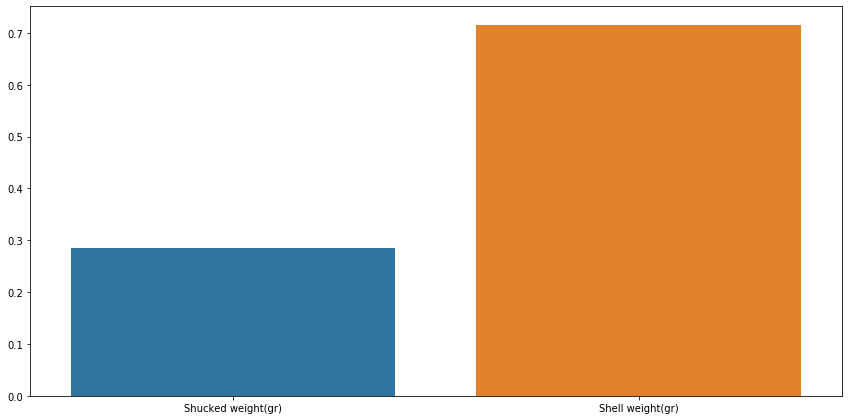

In [59]:
features = [ 'Shucked weight(gr)', 'Shell weight(gr)' ]
min_tree_model_2 = DecisionTreeClassifier( criterion = "entropy", max_depth = min_rmse_depth )
plot_error_curves( min_tree_model_2, 
                  ( training_X[ features ], training_y ), 
                  ( test_X[ features ], test_y ) )

# We find the percentage of data with the lowest RMSE

optimal_test_errors = calculate_error_curves( min_tree_model_2, 
                                             data_percentage_array,
                                             ( training_X[ features ], training_y ),  
                                             ( test_X[ features ], test_y ) )

optimal_data_percentage = ( np.argmin( optimal_test_errors ) + 1 ) * 10
print( optimal_data_percentage )

# We train our new model using just the optimal amount of data and features.

optimal_samples = int( optimal_data_percentage / 100. * len( training_X ) )
optimal_training_X = training_X[ features ][ :optimal_samples ]

min_tree_model_2.fit( optimal_training_X, training_y[ :optimal_samples ] )
predicted_training_y, predicted_test_y = predict( min_tree_model_2, 
                               optimal_training_X, 
                               test_X[ features ] ) ;

# We plot the real values vs the predictions, we observe for test data the RMSE match
# the value we obtained from learning curves plot. 

visualize_predictions( training_y[ :optimal_samples ], predicted_training_y, test_y, predicted_test_y )
plot_features_importance( min_tree_model_2, features )
#graph = plot_tree( min_tree_model_2, 'min-tree-2', features )
#Image( graph.create_png() )

We generated three plots here. First, we showed the error curves for our final model using only two features (**Shuked weight**, and **Shell weight**). The curves reveal that the optimal point is using just **80%** of the training data (whici is the 75% of the dataset). After that, we actually trained the tree model using the amount of data mentioned before, and we presented the Predictions vs Real, including the RMSE. We found that the RMSE match the value presented in the error curves plot. Finally, we plotted the sifnificance of each feature used in the tree, finding that the **Shell weight** is the most relevant one, and also is used as the root of the tree (see generated image min-tree-2.png). 

Next we will evaluate the performance of our model using different metrics. 

### Model Evaluation 
For the evaluation of the model we will use four metrics specific for classification. Next we will describe each of those metrics: 

- **Accuracy**: Accuracy is the most intuitive performance measure and it is just a ratio of correctly predicted observation to the total observations. Accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. 
- **Precision**: Is the ratio of correctly predicted positive observations to the total predicted positive observations.
- **Recall**: Is the ratio of correctly predicted positive observations to the all observations in actual class.
- **F1 Score**: Is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
 
 Initially these metrics works naturally with binary problems, but in the case of multiclass problems, an average technique have to be applied. We will use the macro and weighted average. 




              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         6
           4       0.43      0.77      0.56        13
           5       0.28      0.43      0.34        21
           6       0.30      0.20      0.24        69
           7       0.27      0.32      0.29        94
           8       0.25      0.37      0.29       123
           9       0.26      0.24      0.25       181
          10       0.22      0.39      0.28       160
          11       0.21      0.17      0.19       127
          12       0.15      0.03      0.05        72
          13       0.07      0.04      0.05        46
          14       0.03      0.03      0.03        33
          15       0.17      0.04      0.06        27
          16       0.12      0.06      0.08        17
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00        15
          19       0.00    

C:\Users\Milara\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Milara\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


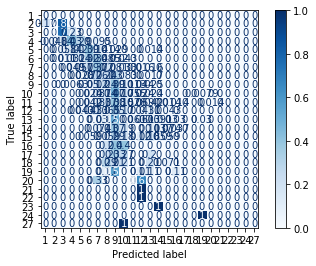

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, recall_score, precision_score, plot_confusion_matrix

# predicted_training_y, predicted_test_y
# print( min_tree_model_2.score( test_X[ features ], test_y ) )

print( classification_report( test_y, predicted_test_y ) )
print( "F1: { micro: %.2g, macro:%.2g, weighted: %.2g }" % ( 
      f1_score( test_y, predicted_test_y, average='micro' ), 
      f1_score( test_y, predicted_test_y, average='macro' ), 
      f1_score( test_y, predicted_test_y, average='weighted' ) ) )
print()

plot_confusion_matrix( min_tree_model_2, test_X[ features ], test_y,
                                 cmap=plt.cm.Blues,
                                 normalize = 'true' )

As we see in the output, we have a precision, recall and f1 score for each of the 22 distinct classes we have. The general accuracy is .28 which is not good enough. The macro average, calculates metrics for each label, and find their unweighted mean. This does not take label imbalance into account. 

### Tree Conclusions

We build a decision tree classifier using the 8 attributes and the 75% of the dataset (around 3k instances). Then we made an analysis to find the optimal depth using two approaches: Cost Complexit Prunning and Learning Curves Analysis. After that we made a second analysis to find the most significant features which were just 2 (**Shuked weight**, and **Shell weight**). And finally we determine the balance between underfitting and overfitting of the training data.

## **KNN**  ##

The classifier *K - Nearest Neighbor* requires several assumptions that the data must comply with. These main assumptions are listed below:

* Data is labeled
* Dimensions are comparable
* There are no irrelevant features
* There is not to much noise

Therefore, it is neccesary to apply the following steps before using the supervised clustering algorithm:

* Data preparation: transform categorical variables and re-scale all the features.


* Feature Selection: use the set of variables that provide more information to explain/predict the target.


The assumptions will not be applied at once, instead we will applied them in groups and then use the KNN algorithm. This will let us compare the effects of the assumptions in the results.

**Note:** This algorithm was selected because by looking at the data we believe that the differences between attributes can be used to predict the classes, in order words to classify by similarity. We also use this becuase the documentation mentions that it is easy to implement it, therefore we want to prove it. 


## Import the Libraries ##

In [28]:
#Importing the necessary Libraries
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Data Preparation ##

The analysis start by checking the dataset and determining the Independent variables and the Target variable. In this case the Target variable is **"Rings"**, which as aforementioned correpponds to the years of the abalone.

In [60]:
df.head()

,Sex,Length(mm),Diameter(mm),Height(mm),Whole weight(gr),Shucked weight(gr),Viscera weight(gr),Shell weight(gr),Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [61]:
#Separation of Dataframe for Independent Variable and Target Variable
df_X = df.drop('Rings', axis = 1)
df_y = df['Rings']

Then, we proceed by transforming the unique categorical variable in the data set to be numeric but with the same weight. For this, we use **One hot encoding**, which separates the different options of "Sex" and create a column for each one of them. 

In [62]:
#Using One hot Encoding to transform Sex from Categorical to Numeric
df_X = pd.get_dummies(df_X)
df_X.head()

,Length(mm),Diameter(mm),Height(mm),Whole weight(gr),Shucked weight(gr),Viscera weight(gr),Shell weight(gr),Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


Finally, we scale the data using **StandardScarler()**. This function allows us to make all the feature have mean=0 and variance of 1. However, for the case of this data set there are variables that have outliers, therefore the range of value is larger than expected.

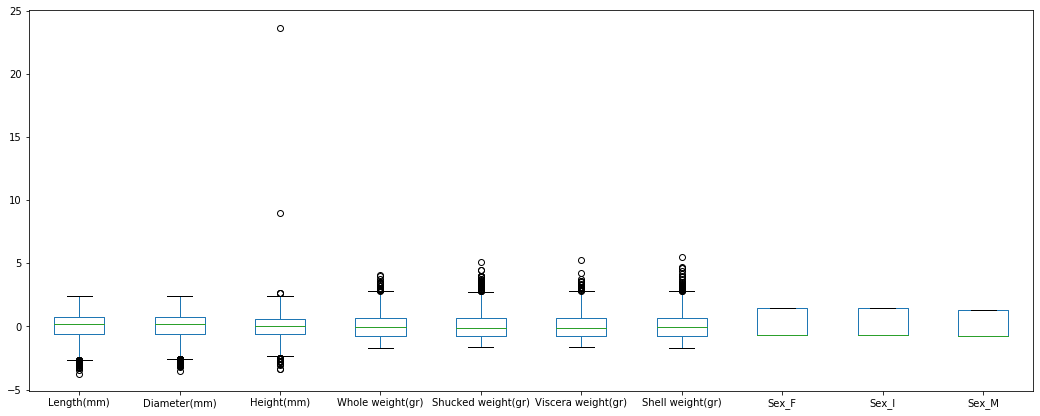

In [63]:
#Standard Scalling the Independent variables
sc_X = StandardScaler()
df_X_scaled =  pd.DataFrame(sc_X.fit_transform(df_X),
        columns=df_X.columns)

df_X_scaled.plot( kind='box', figsize=(18, 7))

## Feature Selection ##

As mentioned before, the irrelevant features and noise are not desired to be in the dataset. Thus, we applied different techniques of **feature selection** to find the best set of features that provide more value to the results of the algorithm. The code below shows each feature selection technique and the performance of the selected variables with the K-NN algorithm. *It is important to highlight that the paramenters for K-NN are not the best but they are the same for all the feature techniques (this to generate a clean comparison)*. 

Each technique is tested as follows:
* The technique is applied
* The algorithm is initialized with 3-NearestNeigbors (arbitray selection)
* The results are obtained by using Repeated Stratisfied K Fold Cross Validations. This allow the code to reduce the bias that a fixed selection of %Train and %Test set may produce. The 5 splits and n repeats are decided ar

### All variables ###

The following code test the algorithm with all the variables. The purpose of this test is to have a baseline.


In [33]:
#Testing using all the variables
#Test using K as 3 -> arbitrary selection

knnt = KNeighborsClassifier(n_neighbors=3)
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
cv_results_full = cross_val_score(estimator=knnt, X=df_X_scaled, y=df_y, cv=cv_method, scoring='accuracy')
print(cv_results_full.mean().round(4))

0.2108


### Chi square Test ###

The follwing technique gets the Chi square test for all the Independent variables. Then a percentile is selected, this means that a certain percentage of the variables with the highest chi square test are selected. In the case of this test the percentile selected was 40%. Note: it is well known this test is used only for categorical/discrete variables, the idea of this test for this data set is to see if it provides something useful because there are some numeric discrete variables. 

In [34]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=40)

X_train_fs = fs.fit_transform(df_X.values, df_y.values)

print(X_train_fs[1,:])
print(df_X.values[1,:])
print(df_X.columns.tolist())

[0.2255 0.0995 0.     0.    ]
[0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07   0.     0.     1.    ]
['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'Whole weight(gr)', 'Shucked weight(gr)', 'Viscera weight(gr)', 'Shell weight(gr)', 'Sex_F', 'Sex_I', 'Sex_M']


In [35]:
#Test using K as 3 -> arbitrary selection

features = ['Whole weight(gr)','Shucked weight(gr)','Sex_F','Sex_I']
knnt = KNeighborsClassifier(n_neighbors=3)
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
cv_results_full = cross_val_score(estimator=knnt, X=df_X_scaled[features], y=df_y, cv=cv_method, scoring='accuracy')
print(cv_results_full.mean().round(4))

0.2164


### Variance ###

This technique applies a Variance Threshold. In order words, it computes the variance for each Independent variable and then selected it of it surpasses the specified threshold. 

In [36]:
#Variance Threshold
sel = VarianceThreshold(threshold=(.6 * (1 - .6)))
X_var = sel.fit_transform(df_X.values)

print(X_var[1,:])
print(df_X.values[1,:])
print(df_X.columns.tolist())

[0.2255]
[0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07   0.     0.     1.    ]
['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'Whole weight(gr)', 'Shucked weight(gr)', 'Viscera weight(gr)', 'Shell weight(gr)', 'Sex_F', 'Sex_I', 'Sex_M']


In [37]:
#Test using K as 3 -> arbitrary selection

features = ['Whole weight(gr)']
knnt = KNeighborsClassifier(n_neighbors=3)
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
cv_results_full = cross_val_score(estimator=knnt, X=df_X_scaled[features], y=df_y, cv=cv_method, scoring='accuracy')
print(cv_results_full.mean().round(4))

0.1847


### F1-Score###

This technique applies the ANOVA test to a group of K-variables. In the case of for this dataset we selected 4. Therefore, the technique will provide the best group of 4 variables statisttically different. This technique is used for numeric variables.


In [44]:
fs_fit_fscore = feature_selection.SelectKBest(feature_selection.f_classif, k=4)
fs_fit_fscore.fit_transform(df_X, df_y)
fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:4]
fs_indices_fscore

array([1, 0, 6, 2], dtype=int64)

In [45]:
best_features_fscore = df_X.columns[fs_indices_fscore].values
best_features_fscore

array(['Diameter(mm)', 'Length(mm)', 'Shell weight(gr)', 'Height(mm)'],
      dtype=object)

In [46]:
#Test using K as 3 -> arbitrary selection

features = ['Diameter(mm)','Length(mm)','Shell weight(gr)','Height(mm)']
knnt = KNeighborsClassifier(n_neighbors=3)
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
cv_results_full = cross_val_score(estimator=knnt, X=df_X_scaled[features], y=df_y, cv=cv_method, scoring='accuracy')
print(cv_results_full.mean().round(4))

0.2122


### Brute Force###

The following technique is not the best one, but sometimes is useful when the set of features is not very large. This technique consist on test-error essays until finding something useful. The downside is that it is time consuming and there is no base of selection rather than finding the combinations that generates the best result.


In [64]:
#Test using K as 3 -> arbitrary selection

features_bf = ['Length(mm)','Diameter(mm)','Whole weight(gr)','Shucked weight(gr)','Viscera weight(gr)','Shell weight(gr)', 'Sex_M','Sex_I']
knnt = KNeighborsClassifier(n_neighbors=3)
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
cv_results_full = cross_val_score(estimator=knnt, X=df_X_scaled[features_bf], y=df_y, cv=cv_method, scoring='accuracy')
print(cv_results_full.mean().round(4))

0.2258


## Comparison ##

Results:

* All variables: 0.2108
* Chi square: 0.2164
* Variance: 0.1847
* F1-Score: 0.2122
* Brute Force: 0.2258

Therefore, the set of variables to be used are the selected by Brute Force.


## Modeling Tunning with Cross Validation ##

The following code corresponds to the use of K-NN algorithm. The purpose of the following code is to find the best parameters. The list below explains the techniques used for this approach:

* **Repeated Stratisfied K folds**, this technique of cross validaiton ensures that the folds are generated by keeping the percentage of samples of each class, this allows the algorithm to learn all the variables according to its presence in the dataset. This technique avoid bias and giving more weight to a variable due to a random selection. The selection of 10 folds is based on the empirical recommenadation. The selection of 2 repeats is was decided to increase the number of tests and the random state as 5 was selected arbitrarily. 
* **GridSearch Cross Validation**, is a method to find the best parameters for the algorithm. For this is necessary to define the parameters to test, such as the K and p (type of distance function either Manhattan or Euclidean). The best parameters are found base on a defined scoring metric. The following code will use four different metrics to select the parameters. 


The different metrics are explained as follows:
* **Accuracy**: is the ratio between all the correct predictions (positives and negatives) and the sum of the actual total negative and positive values. 

* **Precision**: is the ratio between the True Positives (positive values correclty predicted) and all the predicted values (correct and not correct)

* **Recall**: is the ratio between all the True Postives (positive values correctly predicted) and the total actual positives. 

* **F1-score**: is a function between Recall and Precision, normally used when the objective is to find a balance between both. 

**Note:** Precision, Recall and F1, use a suffix "_macro" which computes the metric by class but not using weights for the aggregation. This have an big penalisation when the model does not perfom weel with the minority classes. This was required by the model function to work properly.

The idea of using different metrics to asses the model and select the parameters is based on the fact that all the metrics are good depending on the objective of the model. The following code uses **"Accuracy"** as metric to asses the model.

In [66]:
cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=5)

param_knn = {'n_neighbors': [20,30,40,50,64,70], 
              'p': [1, 2]}

grs_knn_ac = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=param_knn,
                      cv=cv_method,
                      verbose=False,
                      scoring='accuracy',
                      return_train_score=True)

grs_knn_ac.fit(df_X_scaled[features_bf], df_y);

print(grs_knn.best_params_)
print(grs_knn.best_score_)

{'n_neighbors': 70, 'p': 2}
0.27149036751460076


The following code uses **"Precision"** as metric to asses the model.

In [49]:
cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=5)

param_knn = {'n_neighbors': [20,30,40,50,64,70], 
              'p': [1, 2]}

grs_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=param_knn,
                      cv=cv_method,
                      verbose=False,
                      scoring='precision_macro',
                      return_train_score=True)

grs_knn.fit(df_X_scaled[features_bf], df_y);

print(grs_knn.best_params_)
print(grs_knn.best_score_)

{'n_neighbors': 20, 'p': 2}
0.13811296693225095


The following code uses **"Recall** as metric to assess the model.

In [50]:
cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=5)

param_knn = {'n_neighbors': [20,30,40,50,64,70], 
              'p': [1, 2]}

grs_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=param_knn,
                      cv=cv_method,
                      verbose=False,
                      scoring='recall_macro',
                      return_train_score=True)

grs_knn.fit(df_X_scaled[features_bf], df_y);

print(grs_knn.best_params_)
print(grs_knn.best_score_)

{'n_neighbors': 20, 'p': 1}
0.13582624773925084


The following code uses **"F1"** as metric to assess the model.

In [51]:
cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=5)

param_knn = {'n_neighbors': [20,30,40,50,64,70], 
              'p': [1, 2]}

grs_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=param_knn,
                      cv=cv_method,
                      verbose=False,
                      scoring='f1_macro',
                      return_train_score=True)

grs_knn.fit(df_X_scaled[features_bf], df_y);

print(grs_knn.best_params_)
print(grs_knn.best_score_)

{'n_neighbors': 20, 'p': 1}
0.12975255484172926


Note that almost all of the metrics to assess the model provided different parameters. 

* **Accuracy**--->0.27149036751460076, {'n_neighbors': 70, 'p': 2}
* **Precision**-->0.13811296693225095, {'n_neighbors': 20, 'p': 2}
* **Recall**------->0.13582624773925084, {'n_neighbors': 20, 'p': 1}
* **F1-score**--->0.12975255484172926, {'n_neighbors': 20, 'p': 1}

This is expected as each metric targets different objectives. For the case of this work the selected metric is **Accuracy**, therefore we proceed by confirming the results but looking at a graph that contains the results between the Manhattan and Euclidean distances.

## Evaluation with Cross Validation##

This step is an extension of the previous one. The technique applied in the last step already evaluated the model and provided the best parameters, however, the purpose of the following code is to confirm visually the best parameters.

In [67]:
results = pd.DataFrame(grs_knn_ac.cv_results_['params'])
results['Accuracy'] = grs_knn_ac.cv_results_['mean_test_score']
results['Distance'] = results['p'].replace([1,2], ["Manhattan", "Euclidean"])
results = results.drop('p', axis = 1) #p=1 is Manhattan, p=2 is Euclidean
results = results.rename(columns = {'n_neighbors' : 'K'})

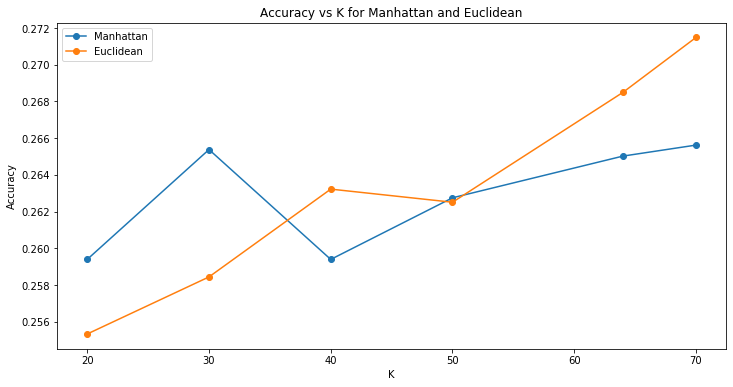

In [68]:
def plot_a_vs_b( k, list_a, list_b ):
  fig, ax = plt.subplots( figsize = ( 12, 6 ) )
  ax.set_xlabel( 'K' )
  ax.set_ylabel( 'Accuracy' )
  ax.set_title( 'Accuracy vs K for Manhattan and Euclidean' )

  ax.plot( k, list_a, marker='o', label='Manhattan')
  ax.plot( k, list_b, marker='o', label="Euclidean")

  ax.legend()
  plt.show()

manhattan = results[results['Distance'] == 'Manhattan']
euclidean = results[results['Distance'] == 'Euclidean']
plot_a_vs_b( manhattan['K'], manhattan['Accuracy'], euclidean['Accuracy'] )

The graph above, cleary shows that the euclidean distance with more than k=60 provides the best results. 

## Conclusion for K-NN ##

This method did not classify very well all the classes. **The overall accuracy reported was around 0.26**. Different techniques were applied to get good results, however, they did not help much the final results. The data was transformed and scaled. The Feature Selection technique provided the best set of variables to use, this to reduce the irrelevant features and the noise that other variables could generate. Then, to find the best parameters for the model two methods in conjuction were used, Repeated Stratisfied Cross Validation and Grid Search Cross Validation. The first one splitted proportinally the dataset in 10 splits and the second one is a method that test the differents possibilites defined in the parameters. **At the end the best parameters were K=70 and P= Euclidean.** Nevertheless the resutls were not very good. This could be due to the imbalance dataset. 

**Note:** the model might be easly to implemented, but there are different types of combinations to make it robust that make the coding much complicated.

## **General Discussion** ##

We used two distinct classifiers over the Abalon dataset.

For the case of the Decision Trees, it looked like a good option, because they naturally handle the problem of feature scaling and nominal features. Eventhoug we found the optimal depth and reduce the number of features from 8 to 2, we could not achieve an acceptable accuracy (.28 in best case). For the optimization of the depth we used two techniques, one based in the alpha parameter for the prunning cost, and the other based on the evaluation of the learning curves by gradualing constraining the maximum depth. 

In the case of the K-NN algorithm presented, we acchieved an accuracy aroung 0.27, with 70 Nearest Neighbors. The accuracy is low and the number of Neighbors is very large. Several techniques to prepare the data, select the best features and paramateres for the models were used, but at the end the best results is the one previously mentioned.

Both models presented a consistency in the accuracy, with just a marginal difference. Even though, the preprocessing phase for the K-NN is a litle longer, because we have to deal with nominal values, which in this case was just the **Sex** attribute. Also, K-NN as is a ditance based classifier, the scaling of the attributes is also important, while in decision trees, again that it is not a problem. 

We believe that the low accuracy is due to the fact that there are many classes and not enough number of instances to train the model for each class. This might be solved by increasing the dataset, and using other types of sampling to make the split between Train and Test set and for K Fold Cross Validations. Another interesting idea would be to use a regression approach instead of a classification. We are triying to estimate the age (or number or rings) of the abalanes based on several attributes, so an approximate (not exact) value of the age could be useful enough, and we can try several other techniques and classifiers to try to improve the achieved results. 


## **General Conclusion** ##

* The Accuracy obtained with trees is 0.28 with a depth = 6 and features = [ 'Shell Weight', 'Shuked Weight' ]
* The Accuracy obtained with KNN is 0.27 with K=70 and p=2 which is Euclidean distance. 
* Both Accuracies are low
* The dataset contains a large number of classes
* The dataset is imbalanced for the number of clasess
* Two classification methods were used to classify the abalone data but with poor performance

## **References** ##

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9


https://www.researchgate.net/publication/337146276_Machine_Learning_Project_-_Predict_the_Age_of_Abalone 


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://datascience.stackexchange.com/questions/40900/whats-the-difference-between-sklearn-f1-score-micro-and-weighted-for-a-mult


https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
